Automobile Price Dataset - First 5 Rows:
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-s

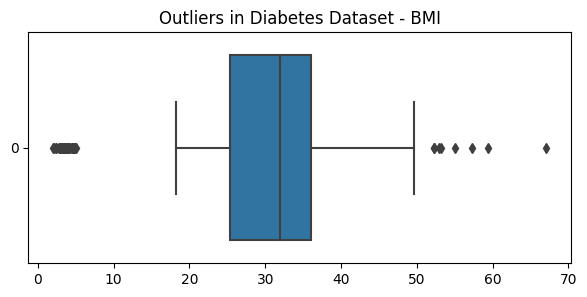


Indexes with outliers in 'price' column using boxplot method:
Int64Index([15, 16, 17, 47, 48, 49, 70, 71, 72, 73, 74, 126, 127, 128], dtype='int64')

Label Encoding for 'num-of-doors':
   num-of-doors
0             1
1             1
2             1
3             0
4             0

One-Hot Encoding for 'body-style':
   convertible  hardtop  hatchback  sedan  wagon
0            1        0          0      0      0
1            1        0          0      0      0
2            0        0          1      0      0
3            0        0          0      1      0
4            0        0          0      1      0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy import stats

# Load Automobile Price Dataset
auto_price = pd.read_csv('/content/Automobile_price_data__Raw_.csv')
print("Automobile Price Dataset - First 5 Rows:")
print(auto_price.head())   # Display first 5 rows

# Handling Missing Values
print("\nHandling Missing Values:")
print(auto_price.isnull().sum())

# Replace '?' (question mark) by null value
auto_price.replace('?', np.nan, inplace=True)

print("\nHandling Missing Values after replacing '?' with NaN:")
print(auto_price.isnull().sum())

auto_price.dtypes    # dtypes show data types of each column

# Convert Object columns to Numerical columns
cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
auto_price[cols] = auto_price[cols].apply(pd.to_numeric)

print("\nInformation after converting Object columns to Numerical columns:")
print(auto_price.info())

# Methods to handle missing data
# Replace by central tendency. For numerical data replace by mean or median. For categorical data replace by mode.
# Imputation - SimpleImputer
# fillna() - Fill missing value by central tendency.
# ffill()/bfill() - Should be used mostly in time series data.
# dropna() - Drop rows with missing data.

auto_price['normalized-losses'].replace(np.nan, auto_price['normalized-losses'].mean(), inplace=True)

auto_price['price'].fillna(np.round(auto_price['price'].mean()), inplace=True)

print("\nHandling missing values in 'normalized-losses' and 'price':")
print(auto_price[['normalized-losses', 'price']].isnull().sum())

# Dropna() - It drops data rows with missing entries in any column.
auto_price.dropna(inplace=True)

print("\nAutomobile Price Dataset after dropping rows with missing values:")
print(auto_price.head())

# Read Diabetes Dataset
diabetes = pd.read_csv('/content/Diabetes_Preprocessing.csv')
print("\nDiabetes Dataset - First 5 Rows:")
print(diabetes.head())

print("\nHandling Missing Values in Diabetes Dataset:")
print(diabetes.isnull().sum())

# Imputation - It is a technique used for replacing multiple missing data with a suitable value for most/multiple selected data columns.
impute = SimpleImputer(strategy='median')
data_array = impute.fit_transform(diabetes)
diabetes_df1 = pd.DataFrame(data_array, columns=diabetes.columns)

print("\nDiabetes Dataset after Imputation:")
print(diabetes_df1.head())

# Outliers
# There are two definitions:
# a) Using Boxplot
# b) Using z-score.

auto_price_numerical = auto_price.select_dtypes(['int64', 'float64'])
# Apply z-transformation on all columns
z_score = stats.zscore(auto_price_numerical)

# np.where() returns rows & column indexes with outliers
outliers_index = np.where((z_score > 3) | (z_score < -3))

print("\nIndexes with outliers using z-score method:")
print(outliers_index)

# Finding outliers using boxplot method.
plt.figure(figsize=(7, 3))
sns.boxplot(diabetes['BMI'], orient='h')
plt.title("Outliers in Diabetes Dataset - BMI")
plt.show()

q1 = diabetes['BMI'].quantile(.25)   # Calculate first quartile
q3 = diabetes['BMI'].quantile(.75)   # Calculate third quartile

def find_outliers(df, cols):
    q1 = df[cols].quantile(.25)
    q3 = df[cols].quantile(.75)
    iqr = q3 - q1   # Calculate interquartile range
    min_r = q1 - 1.5 * iqr
    max_r = q3 + 1.5 * iqr
    outlier_indexes = df.index[(df[cols] < min_r) | (df[cols] > max_r)]
    return outlier_indexes

outlier_indexes = find_outliers(auto_price, 'price')
print("\nIndexes with outliers in 'price' column using boxplot method:")
print(outlier_indexes)

# Treating Outliers
# Remove/Trim the Outliers
# Replace Outliers by Mean/Median

# Data Pre-Processing
# Data Scaling
# Categorical to Numerical - Label Encoding, One-Hot Encoding

auto_price['num-of-doors'].unique()   # Method to implement label encoder

# Label encoder which will map categorical values in alphabetical order to 0, 1, 2, 3, 4, 5
from sklearn.preprocessing import LabelEncoder
le_encode = LabelEncoder()
auto_price['num-of-doors'] = le_encode.fit_transform(auto_price['num-of-doors'])

print("\nLabel Encoding for 'num-of-doors':")
print(auto_price[['num-of-doors']].head())

print("\nOne-Hot Encoding for 'body-style':")
print(pd.get_dummies(auto_price['body-style']).head())
